In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
category=['rec.motorcycles']
train1 = fetch_20newsgroups(subset='train',categories=category)

In [4]:
list(train1.target_names)

['rec.motorcycles']

In [5]:
train1.data

['From: sturges@oasys.dt.navy.mil (Richard Sturges)\nSubject: Re: Rejetting carbs..\nReply-To: sturges@oasys.dt.navy.mil (Richard Sturges)\nOrganization: Carderock Division, NSWC, Bethesda, MD\nLines: 34\n\nNow, I am jumping into the middle of this thread so I may not know\nwhat y\'all been talking about, but I have a few comments:\n\nIn rec.motorcycles, davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:\n>1.  Unless an engine is supercharged, the pressure available to force\n>air into the intake tract is _atmospheric_.  At the time the intake\n>valve is opened, the pressure differential available to move air is only\n>the difference between the combustion chamber pressure (left over after\n>the exhaust stroke) and atmospheric.  As the piston decends on the\n>intake stroke, combustion chamber pressure is decreased, allowing\n>atmospheric pressure to move more air into the intake tract.  At no time\n>does the pressure ever become "negative", or even approach a good\n>vacuum.\n\nTher

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/mohit/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/mohit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
df=pd.DataFrame(train1.data,columns=['text'])

In [8]:
df1=pd.DataFrame(np.zeros(598),columns=['label'])

In [9]:
df=pd.concat([df,df1],axis=1)

In [10]:
df=df.head(200)

In [11]:
df

,text,label
0,From: sturges@oasys.dt.navy.mil (Richard Sturg...,0.0
1,From: mbeaving@bnr.ca (Michael Beavington)\nSu...,0.0
2,From: azw@aber.ac.uk (Andy Woodward)\nSubject:...,0.0
3,From: essbaum@rchland.vnet.ibm.com (Alexander ...,0.0
4,From: bclarke@galaxy.gov.bc.ca\nSubject: Fortu...,0.0
5,From: klf@druwa.ATT.COM (FranklinKL)\nSubject:...,0.0
6,From: parr@acs.ucalgary.ca (Charles Parr)\nSub...,0.0
7,From: ba7116326@ntuvax.ntu.ac.sg\nSubject: V-m...,0.0
8,From: brown@venus.iucf.indiana.edu (Robert J. ...,0.0
9,From: kens@lsid.hp.com (Ken Snyder)\nSubject: ...,0.0


In [12]:
category=['rec.sport.baseball']
train2 = fetch_20newsgroups(subset='train',categories=category)

In [13]:
df1=pd.DataFrame(train2.data,columns=['text'])
df1.shape

(597, 1)

In [14]:
df2=pd.DataFrame(np.ones(597),columns=['label'])

In [15]:
df2

,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [16]:
df1=pd.concat([df1,df2],axis=1)

In [17]:
df1

,text,label
0,From: genetic+@pitt.edu (David M. Tate)\nSubje...,1.0
1,Organization: University of Notre Dame - Offic...,1.0
2,From: mlogan@thurman.prime.com (Max Logan x231...,1.0
3,From: steph@pegasus.cs.uiuc.edu (Dale Stephens...,1.0
4,From: Eastgate@world.std.com (Mark Bernstein)\...,1.0
5,From: shapiro-david@yale.edu (David Shapiro)\n...,1.0
6,From: rsmith@strobe.ATC.Olivetti.Com (Russ Smi...,1.0
7,From: atchison@cis.ohio-state.edu (mark edward...,1.0
8,From: marc@yogi.austin.ibm.com (Marc J. Stephe...,1.0
9,From: savoy@hg.uleth.ca (Jim Savoy)\nSubject: ...,1.0


In [18]:
df1=df1.head(200)

In [19]:
df1

,text,label
0,From: genetic+@pitt.edu (David M. Tate)\nSubje...,1.0
1,Organization: University of Notre Dame - Offic...,1.0
2,From: mlogan@thurman.prime.com (Max Logan x231...,1.0
3,From: steph@pegasus.cs.uiuc.edu (Dale Stephens...,1.0
4,From: Eastgate@world.std.com (Mark Bernstein)\...,1.0
5,From: shapiro-david@yale.edu (David Shapiro)\n...,1.0
6,From: rsmith@strobe.ATC.Olivetti.Com (Russ Smi...,1.0
7,From: atchison@cis.ohio-state.edu (mark edward...,1.0
8,From: marc@yogi.austin.ibm.com (Marc J. Stephe...,1.0
9,From: savoy@hg.uleth.ca (Jim Savoy)\nSubject: ...,1.0


In [20]:
df=pd.concat([df,df1])


In [21]:
df=df.reset_index(drop=True)

In [22]:
df

,text,label
0,From: sturges@oasys.dt.navy.mil (Richard Sturg...,0.0
1,From: mbeaving@bnr.ca (Michael Beavington)\nSu...,0.0
2,From: azw@aber.ac.uk (Andy Woodward)\nSubject:...,0.0
3,From: essbaum@rchland.vnet.ibm.com (Alexander ...,0.0
4,From: bclarke@galaxy.gov.bc.ca\nSubject: Fortu...,0.0
5,From: klf@druwa.ATT.COM (FranklinKL)\nSubject:...,0.0
6,From: parr@acs.ucalgary.ca (Charles Parr)\nSub...,0.0
7,From: ba7116326@ntuvax.ntu.ac.sg\nSubject: V-m...,0.0
8,From: brown@venus.iucf.indiana.edu (Robert J. ...,0.0
9,From: kens@lsid.hp.com (Ken Snyder)\nSubject: ...,0.0


In [23]:
#remove email id
def rem_email(col):
    text=col[0]
    text=re.sub(r'\S*@\S*\s?',"",text)
    return text
df['text']=df[['text']].apply(rem_email,axis=1)

In [24]:
df['text']

0      From: (Richard Sturges)\nSubject: Re: Rejettin...
1      From: (Michael Beavington)\nSubject: Re: Ok, S...
2      From: (Andy Woodward)\nSubject: Re: Dr. Dement...
3      From: (Alexander Essbaum)\nSubject: header pai...
4      From: Subject: Fortune-guzzler barred from bar...
5      From: (FranklinKL)\nSubject: Re: Hell-mets.\nS...
6      From: (Charles Parr)\nSubject: Re: Hell-mets.\...
7      From: Subject: V-max handling request\nLines: ...
8      From: (Robert J. Brown)\nSubject: Re: Shaft-dr...
9      From: (Ken Snyder)\nSubject: Re: Should I buy ...
10     From: Subject: Misc./buying info. needed\nOrga...
11     From: (Curtis Jackson)\nSubject: Tracing licen...
12     From: (Blaine Gardner)\nSubject: Re: FJ1100/12...
13     From: (Philip K. Stone)\nSubject: Re: Counters...
14     From: (Charles Parr)\nSubject: Re: Insurance a...
15     From: (Ivan D. Reid)\nSubject: Re: This just i...
16     From: (Blaine Gardner)\nSubject: Re: MOTORCYCL...
17     From: (Keith Hanlan)\nSu

In [25]:
#remove user
def rem_user(col):
    text=col[0]
    text=re.sub(r'From: [(A-Za-z0-9_ )]*\nSubject: ',"",text)
    return text
df['text']=df[['text']].apply(rem_user,axis=1)

In [26]:
#remove from
def rem_from(col):
    text=col[0]
    text=re.sub(r'From: ',"",text)
    return text
df['text']=df[['text']].apply(rem_from,axis=1)

In [27]:
#remove Reply-To
def rem_reply(col):
    text=col[0]
    text=re.sub(r'Reply-To: ',"",text)
    return text
df['text']=df[['text']].apply(rem_reply,axis=1)

In [28]:
df['text']

0      Re: Rejetting carbs..\n(Richard Sturges)\nOrga...
1      Re: Ok, So I was a little hasty...\nNntp-Posti...
2      Re: Dr. Demento\nOrganization: University Coll...
3      header paint\nDisclaimer: This posting represe...
4      Subject: Fortune-guzzler barred from bars!\nOr...
5      Re: Hell-mets.\nSummary: Visual damage is NOT ...
6      Re: Hell-mets.\nNntp-Posting-Host: acs3.acs.uc...
7      Subject: V-max handling request\nLines: 5\nNnt...
8      (Robert J. Brown)\nSubject: Re: Shaft-drives a...
9      Re: Should I buy a VRF 750?\nArticle-I.D.: hps...
10     Subject: Misc./buying info. needed\nOrganizati...
11     Tracing license plates of BDI cagers?\nArticle...
12     Re: FJ1100/1200 Owners: Tankbag Suggestions Wa...
13     (Philip K. Stone)\nSubject: Re: Countersteerin...
14     Re: Insurance and lotsa points...\nNntp-Postin...
15     (Ivan D. Reid)\nSubject: Re: This just in . . ...
16     Re: MOTORCYCLE DETAILING TIP #18\nNntp-Posting...
17     Re: Insurance and lotsa 

In [29]:
#remove re
def rem_re(col):
    text=col[0]
    text=re.sub(r'Re: ',"",text)
    return text
df['text']=df[['text']].apply(rem_re,axis=1)

In [30]:
#remove Subject
def rem_subject(col):
    text=col[0]
    text=re.sub(r'Subject: ',"",text)
    return text
df['text']=df[['text']].apply(rem_subject,axis=1)

In [31]:
#removal of special characters
def rem_special(col):
    text=col[0]
    text=re.sub(r'[^A-Za-z0-9]+'," ",text)
    return text
df['text']=df[['text']].apply(rem_special,axis=1)

In [32]:
df['text']

0      Rejetting carbs Richard Sturges Organization C...
1      Ok So I was a little hasty Nntp Posting Host b...
2      Dr Demento Organization University College of ...
3      header paint Disclaimer This posting represent...
4      Fortune guzzler barred from bars Organization ...
5      Hell mets Summary Visual damage is NOT an indi...
6      Hell mets Nntp Posting Host acs3 acs ucalgary ...
7      V max handling request Lines 5 Nntp Posting Ho...
8       Robert J Brown Shaft drives and Wheelies News...
9      Should I buy a VRF 750 Article I D hpscit 1qkc...
10     Misc buying info needed Organization Hampshire...
11     Tracing license plates of BDI cagers Article I...
12     FJ1100 1200 Owners Tankbag Suggestions Wanted ...
13      Philip K Stone Countersteering FAQ please pos...
14     Insurance and lotsa points Nntp Posting Host a...
15      Ivan D Reid This just in Organization TRIUMF ...
16     MOTORCYCLE DETAILING TIP 18 Nntp Posting Host ...
17     Insurance and lotsa poin

In [33]:
def rem_dig(col):
    text=col[0]
    text=re.sub(r'\d+',"",text)
    return text
df['text']=df[['text']].apply(rem_dig,axis=1)

In [34]:
df['text']

0      Rejetting carbs Richard Sturges Organization C...
1      Ok So I was a little hasty Nntp Posting Host b...
2      Dr Demento Organization University College of ...
3      header paint Disclaimer This posting represent...
4      Fortune guzzler barred from bars Organization ...
5      Hell mets Summary Visual damage is NOT an indi...
6      Hell mets Nntp Posting Host acs acs ucalgary c...
7      V max handling request Lines  Nntp Posting Hos...
8       Robert J Brown Shaft drives and Wheelies News...
9      Should I buy a VRF  Article I D hpscit qkcrt q...
10     Misc buying info needed Organization Hampshire...
11     Tracing license plates of BDI cagers Article I...
12     FJ  Owners Tankbag Suggestions Wanted Nntp Pos...
13      Philip K Stone Countersteering FAQ please pos...
14     Insurance and lotsa points Nntp Posting Host a...
15      Ivan D Reid This just in Organization TRIUMF ...
16     MOTORCYCLE DETAILING TIP  Nntp Posting Host   ...
17     Insurance and lotsa poin

In [35]:
#conversion to lowercase
def con_tolower(col):
    text=col[0]
    text=text.lower()
    return text
df['text']=df[['text']].apply(con_tolower,axis=1)

In [36]:
df['text']

0      rejetting carbs richard sturges organization c...
1      ok so i was a little hasty nntp posting host b...
2      dr demento organization university college of ...
3      header paint disclaimer this posting represent...
4      fortune guzzler barred from bars organization ...
5      hell mets summary visual damage is not an indi...
6      hell mets nntp posting host acs acs ucalgary c...
7      v max handling request lines  nntp posting hos...
8       robert j brown shaft drives and wheelies news...
9      should i buy a vrf  article i d hpscit qkcrt q...
10     misc buying info needed organization hampshire...
11     tracing license plates of bdi cagers article i...
12     fj  owners tankbag suggestions wanted nntp pos...
13      philip k stone countersteering faq please pos...
14     insurance and lotsa points nntp posting host a...
15      ivan d reid this just in organization triumf ...
16     motorcycle detailing tip  nntp posting host   ...
17     insurance and lotsa poin

In [37]:
from nltk.corpus import stopwords
set1=set(stopwords.words('english'))

In [38]:
from nltk.tokenize import word_tokenize
def stop_words1(col):
    text=col[0]
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in set1]
    return filtered_sentence
df['text']=df[['text']].apply(stop_words1,axis=1)

In [39]:
df['text']

0      [rejetting, carbs, richard, sturges, organizat...
1      [ok, little, hasty, nntp, posting, host, bmerh...
2      [dr, demento, organization, university, colleg...
3      [header, paint, disclaimer, posting, represent...
4      [fortune, guzzler, barred, bars, organization,...
5      [hell, mets, summary, visual, damage, indicato...
6      [hell, mets, nntp, posting, host, acs, acs, uc...
7      [v, max, handling, request, lines, nntp, posti...
8      [robert, j, brown, shaft, drives, wheelies, ne...
9      [buy, vrf, article, hpscit, qkcrt, q, organiza...
10     [misc, buying, info, needed, organization, ham...
11     [tracing, license, plates, bdi, cagers, articl...
12     [fj, owners, tankbag, suggestions, wanted, nnt...
13     [philip, k, stone, countersteering, faq, pleas...
14     [insurance, lotsa, points, nntp, posting, host...
15     [ivan, reid, organization, triumf, tri, univer...
16     [motorcycle, detailing, tip, nntp, posting, ho...
17     [insurance, lotsa, point

In [40]:
def capping(col):
    text=col[0]
    text_new=[]
    for i in text:
        if(len(i)<=2 or len(i)>=15):
            continue
        else:
            text_new.append(i)
    return text_new
df['text']=df[['text']].apply(capping,axis=1)

In [41]:
df['text']

0      [rejetting, carbs, richard, sturges, organizat...
1      [little, hasty, nntp, posting, host, bmerh, or...
2      [demento, organization, university, college, w...
3      [header, paint, disclaimer, posting, represent...
4      [fortune, guzzler, barred, bars, organization,...
5      [hell, mets, summary, visual, damage, indicato...
6      [hell, mets, nntp, posting, host, acs, acs, uc...
7      [max, handling, request, lines, nntp, posting,...
8      [robert, brown, shaft, drives, wheelies, news,...
9      [buy, vrf, article, hpscit, qkcrt, organizatio...
10     [misc, buying, info, needed, organization, ham...
11     [tracing, license, plates, bdi, cagers, articl...
12     [owners, tankbag, suggestions, wanted, nntp, p...
13     [philip, stone, faq, please, post, nntp, posti...
14     [insurance, lotsa, points, nntp, posting, host...
15     [ivan, reid, organization, triumf, tri, univer...
16     [motorcycle, detailing, tip, nntp, posting, ho...
17     [insurance, lotsa, point

In [42]:
# def joins(col):
#     text=col[0]
#     text=' '.join(text)
#     return text
# df['text']=df[['text']].apply(joins,axis=1)

In [43]:
df['text']

0      [rejetting, carbs, richard, sturges, organizat...
1      [little, hasty, nntp, posting, host, bmerh, or...
2      [demento, organization, university, college, w...
3      [header, paint, disclaimer, posting, represent...
4      [fortune, guzzler, barred, bars, organization,...
5      [hell, mets, summary, visual, damage, indicato...
6      [hell, mets, nntp, posting, host, acs, acs, uc...
7      [max, handling, request, lines, nntp, posting,...
8      [robert, brown, shaft, drives, wheelies, news,...
9      [buy, vrf, article, hpscit, qkcrt, organizatio...
10     [misc, buying, info, needed, organization, ham...
11     [tracing, license, plates, bdi, cagers, articl...
12     [owners, tankbag, suggestions, wanted, nntp, p...
13     [philip, stone, faq, please, post, nntp, posti...
14     [insurance, lotsa, points, nntp, posting, host...
15     [ivan, reid, organization, triumf, tri, univer...
16     [motorcycle, detailing, tip, nntp, posting, ho...
17     [insurance, lotsa, point

In [44]:
set1=set()
def push_in_set(col):
    text=col[0]
    set1.update(text)
df[['text']].apply(push_in_set,axis=1)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
370    None
371    None
372    None
373    None
374    None
375    None
376    None
377    None
378    None
379    None
380    None
381    None
382    None
383    None
384    None
385    None
386    None
387    None
388    None
389    None
390    None
391    None
392    None
393    None
394    None
395    None
396    None
397    None
398    None
399    None
Length: 400, dtype: object

In [45]:
len(set1)

9283

In [46]:
mat=np.zeros([df.shape[0],len(set1)])

In [47]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
d=dict()
k=0;
for i in set1:
    d[i]=k
    k=k+1


In [49]:
d

{'hating': 7529,
 'castillo': 0,
 'deshaies': 5742,
 'viable': 5827,
 'pilot': 1,
 'switching': 4637,
 'understanding': 8853,
 'thrown': 4657,
 'minor': 9072,
 'fatigue': 4638,
 'tear': 3070,
 'unit': 7605,
 'background': 1515,
 'stephen': 4639,
 'barkwell': 4635,
 'pressure': 4640,
 'agrees': 8915,
 'ravages': 2,
 'chromed': 4641,
 'skipped': 3,
 'kirschenbaum': 8499,
 'operation': 4,
 'contributed': 5,
 'locking': 5649,
 'campbell': 6,
 'opi': 7,
 'sgi': 9,
 'utexas': 12,
 'wmtc': 11,
 'sticks': 6195,
 'snf': 4636,
 'kdlaa': 14,
 'daytona': 4645,
 'reap': 8500,
 'heady': 16,
 'secretive': 4648,
 'glenn': 8329,
 'decrease': 17,
 'showering': 4650,
 'online': 18,
 'callison': 19,
 'bizarre': 21,
 'afford': 4653,
 'elect': 22,
 'gpndg': 4654,
 'jiann': 24,
 'compensation': 25,
 'installation': 6405,
 'accept': 26,
 'drink': 4656,
 'allowed': 27,
 'twist': 4658,
 'explain': 28,
 'gsxrj': 29,
 'shannon': 3847,
 'senner': 8481,
 'instructions': 30,
 'cap': 31,
 'health': 32,
 'floating': 4

In [50]:
def count_matrix(col,k):
    text=col
    for i in text:
        mat[k][d[i]]=mat[k][d[i]]+1
k=0
for i in df['text']:
    #print(i)
    count_matrix(i,k)
    k=k+1

In [51]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
mat.shape

(400, 9283)

In [53]:
#Creating tf-idf matrix

In [54]:
total_no_of_documents=df.shape[0]
total_no_of_words=len(set1)
tf=np.zeros([total_no_of_documents,total_no_of_words])

k=0
for i in mat:
    cnt=0
    p=0
    for j in i:
        cnt=cnt+j
    for j in i:
        tf[(k,p)]=j/cnt
        p=p+1
    k=k+1

In [55]:
import math
no_of_documents_per_word=np.zeros(total_no_of_words)
for i in mat:
    p=0
    for j in i:
        if j > 0:
            no_of_documents_per_word[p]=no_of_documents_per_word[p]+1;
        p=p+1;

idf=np.zeros(total_no_of_words)
k=0
for i in no_of_documents_per_word:
    idf[k]=math.log10(total_no_of_documents/i)
    k=k+1

In [56]:
tf_idf=np.zeros([total_no_of_documents,total_no_of_words])
k=0;
for i in mat:
    p=0;
    for j in i:
        tf_idf[(k,p)]=idf[p]*tf[k,p];
        p=p+1;
    k=k+1

In [57]:
tf_idf[:,0]
tf_idf.shape

(400, 9283)

In [58]:
for i in tf_idf:
    for j in i:
        if j == float('inf'):
            print (j)

In [59]:
mean_mat=np.zeros([1,tf_idf.shape[1]])
std_mat=np.zeros([1,tf_idf.shape[1]])
for i in range(0,tf_idf.shape[1]):
    mean_mat[0,i]=np.mean(tf_idf[:,i])
    std_mat[0,i]=np.std(tf_idf[:,i])

In [60]:
for i in range(0,std_mat.shape[0]):
    for j in range(0,std_mat.shape[1]):
        if(std_mat[i,j]==0):
            x1=i
            y1=j

In [61]:
std_mat
std_mat[x1,y1]=np.mean(std_mat[0,:])

In [62]:
X=np.zeros([tf_idf.shape[0],tf_idf.shape[1]])
for i in range(0,tf_idf.shape[0]):
    for j in range(0,tf_idf.shape[1]):
        X[i,j]=(tf_idf[i,j]-mean_mat[0][j])/std_mat[0][j]

In [63]:
X

array([[-0.06081666, -0.13988598, -0.05006262, ..., -0.05006262,
        -0.10260934, -0.09448425],
       [-0.06081666, -0.13988598, -0.05006262, ..., -0.05006262,
        -0.10260934, -0.09448425],
       [-0.06081666, -0.13988598, -0.05006262, ..., -0.05006262,
        -0.10260934, -0.09448425],
       ...,
       [-0.06081666, -0.13988598, -0.05006262, ..., -0.05006262,
        -0.10260934, -0.09448425],
       [-0.06081666, -0.13988598, -0.05006262, ..., -0.05006262,
        -0.10260934, -0.09448425],
       [-0.06081666, -0.13988598, -0.05006262, ..., -0.05006262,
        -0.10260934, -0.09448425]])

In [64]:
#creating covariance matrix
# for i in range(0,X.shape[0]):
#     X[i,:]=X[i,:]-mean_mat[0,:]

In [65]:
mean_vec=np.mean(X,axis=0)

In [66]:
mean_vec

array([-4.12864187e-18, -4.44089210e-18,  2.48655263e-16, ...,
        1.73194792e-16, -3.73520659e-16,  6.80011603e-17])

In [67]:
cov=np.zeros([X.shape[1],X.shape[1]])
cov= (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)

In [68]:
cov

array([[ 1.00250627, -0.00852872, -0.00305227, ..., -0.00305227,
        -0.006256  , -0.00576062],
       [-0.00852872,  1.00250627, -0.00702061, ..., -0.00702061,
        -0.01438958, -0.01325015],
       [-0.00305227, -0.00702061,  1.00250627, ..., -0.00251255,
        -0.00514977, -0.00474198],
       ...,
       [-0.00305227, -0.00702061, -0.00251255, ...,  1.00250627,
        -0.00514977, -0.00474198],
       [-0.006256  , -0.01438958, -0.00514977, ..., -0.00514977,
         1.00250627, -0.00971927],
       [-0.00576062, -0.01325015, -0.00474198, ..., -0.00474198,
        -0.00971927,  1.00250627]])

In [69]:
from sklearn.decomposition import PCA

In [70]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [71]:
eig_vals

array([5.63628596e+02+0.j, 2.16998355e+02+0.j, 1.83793068e+02+0.j, ...,
       3.09393434e-78+0.j, 3.75918968e-69+0.j, 0.00000000e+00+0.j])

In [72]:
eig_vecs

array([[-1.38346755e-04+0.j, -2.16403196e-04+0.j, -2.02717326e-04+0.j,
        ..., -2.63673801e-11+0.j,  6.46574319e-11+0.j,
         0.00000000e+00+0.j],
       [-3.04798388e-04+0.j, -4.82935307e-04+0.j, -6.25317789e-04+0.j,
        ..., -2.40067032e-09+0.j,  1.96604090e-09+0.j,
         0.00000000e+00+0.j],
       [-1.12485675e-04+0.j, -1.91724695e-04+0.j, -7.23444907e-05+0.j,
        ..., -7.20575447e-10+0.j,  7.62950904e-10+0.j,
         0.00000000e+00+0.j],
       ...,
       [ 4.21683021e-02+0.j, -1.10747146e-03+0.j, -5.16215910e-05+0.j,
        ...,  7.66510961e-08+0.j, -5.72707510e-08+0.j,
         0.00000000e+00+0.j],
       [-2.27075174e-04+0.j, -3.17156114e-04+0.j,  2.47989212e-03+0.j,
        ...,  6.15818775e-09+0.j, -4.84340953e-09+0.j,
         0.00000000e+00+0.j],
       [-1.72912586e-04+0.j, -2.96782553e-04+0.j, -4.40536599e-04+0.j,
        ..., -2.37211231e-07+0.j,  2.43831231e-07+0.j,
         0.00000000e+00+0.j]])

In [73]:
eig_vecs.shape

(9283, 9283)

In [74]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print("Eigen values in descending order:")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
563.6285961224177
216.9983546784931
183.79306763798309
104.99784532191906
94.85819328963579
87.65830395320805
72.60710446111007
71.28427163513568
69.9296625531431
66.95416591139956
65.51142246713297
61.754382893194624
58.82316321029346
58.49371305995859
54.41277780604377
53.981690638188056
53.462808530792046
50.4131106414546
49.81166638032116
47.641609110551606
46.640454581661245
46.37098255870739
45.61764900620756
45.20275956349501
43.312786633449214
42.98750626211365
42.08420219352771
41.52978259024624
41.24497409671229
40.959454758072724
40.055157745155626
39.99531747616474
39.85521157915028
39.31274723539486
39.1230471152375
38.31274612359631
37.974026793561464
37.8854494717194
37.75336460569724
37.71751081304656
37.48314582861091
37.124577891610755
36.86919982837891
36.686644519159195
36.01846400071136
35.8556379549232
35.50834163510679
35.06298372818695
34.934039058205315
34.83890397603588
34.57445470313141
34.30735574914052
33.938906747375746
33

2.373778323722802e-14
2.373778323722802e-14
2.373624112743643e-14
2.373624112743643e-14
2.3703249300338366e-14
2.3703249300338366e-14
2.3694603941100965e-14
2.3678646209438942e-14
2.3600817295018807e-14
2.3599688880969555e-14
2.3599688880969555e-14
2.3597283620173428e-14
2.3597283620173428e-14
2.353069373905039e-14
2.353069373905039e-14
2.3497166738695404e-14
2.3463647824662296e-14
2.3463647824662296e-14
2.3445335514303835e-14
2.3445335514303835e-14
2.3423666549973738e-14
2.3423666549973738e-14
2.3400948528865215e-14
2.3337685625816453e-14
2.3337685625816453e-14
2.3269664418219268e-14
2.3269664418219268e-14
2.3260472935956602e-14
2.3260472935956602e-14
2.323902439454183e-14
2.323902439454183e-14
2.3224301638425588e-14
2.3195324687479806e-14
2.311887972474208e-14
2.311887972474208e-14
2.311500729544564e-14
2.311500729544564e-14
2.3100004186499138e-14
2.3069444649361503e-14
2.3069444649361503e-14
2.30337093813917e-14
2.30337093813917e-14
2.3021174141935495e-14
2.2988184355683312e-14
2.29

4.688840257664493e-15
4.688840257664493e-15
4.685447938875578e-15
4.685447938875578e-15
4.682446304076013e-15
4.682446304076013e-15
4.6791857861595594e-15
4.6791857861595594e-15
4.6747416196285976e-15
4.6747416196285976e-15
4.6690540635375226e-15
4.6690540635375226e-15
4.668360420163504e-15
4.668360420163504e-15
4.652415297003564e-15
4.652415297003564e-15
4.65205947575276e-15
4.65205947575276e-15
4.639962962934156e-15
4.639962962934156e-15
4.6371112326388264e-15
4.6371112326388264e-15
4.636611096714537e-15
4.636611096714537e-15
4.6287200754491174e-15
4.6287200754491174e-15
4.612859943599399e-15
4.612859943599399e-15
4.6123540152619146e-15
4.6123540152619146e-15
4.611771181845055e-15
4.598754456629393e-15
4.598754456629393e-15
4.593336185380122e-15
4.593336185380122e-15
4.5879404471934026e-15
4.5879404471934026e-15
4.580456700937467e-15
4.580456700937467e-15
4.5758593888603455e-15
4.5758593888603455e-15
4.5527538550849924e-15
4.5527538550849924e-15
4.510951011103657e-15
4.50400320790341

9.239441228269461e-30
9.239441228269461e-30
9.207192306382599e-30
9.207192306382599e-30
9.1903462539346e-30
9.1903462539346e-30
9.182118513788358e-30
9.182118513788358e-30
9.180433974230767e-30
9.180433974230767e-30
9.143466173838884e-30
9.143466173838884e-30
9.132256083906705e-30
9.132256083906705e-30
9.123269428685756e-30
9.123269428685756e-30
9.109381229858992e-30
9.109381229858992e-30
9.095212322501253e-30
9.095212322501253e-30
9.09202564949005e-30
9.09202564949005e-30
9.0847833787631e-30
9.0847833787631e-30
9.073417550367888e-30
9.073417550367888e-30
9.003277979008889e-30
9.003277979008889e-30
8.98152923621678e-30
8.98152923621678e-30
8.956683036637203e-30
8.956683036637203e-30
8.932326032528417e-30
8.932326032528417e-30
8.925652940846919e-30
8.925652940846919e-30
8.923597157699375e-30
8.923597157699375e-30
8.907246004312535e-30
8.907246004312535e-30
8.871072816437503e-30
8.871072816437503e-30
8.86667957534764e-30
8.86667957534764e-30
8.813686606208415e-30
8.813686606208415e-30
8.

2.988762259206967e-31
2.9820470666565313e-31
2.9820470666565313e-31
2.972384698491361e-31
2.972384698491361e-31
2.971833321408344e-31
2.971833321408344e-31
2.9687777782507316e-31
2.9687777782507316e-31
2.961996427023348e-31
2.961996427023348e-31
2.9548236961315344e-31
2.9548236961315344e-31
2.9250110729821556e-31
2.9250110729821556e-31
2.914108382969747e-31
2.914108382969747e-31
2.8944716131794994e-31
2.8944716131794994e-31
2.870631600763521e-31
2.870631600763521e-31
2.857871665596965e-31
2.832178737138414e-31
2.832178737138414e-31
2.809588748270469e-31
2.809588748270469e-31
2.8084932047003445e-31
2.8084932047003445e-31
2.807912712076751e-31
2.807912712076751e-31
2.798293405996247e-31
2.798293405996247e-31
2.7915016123333154e-31
2.7915016123333154e-31
2.7744594020644363e-31
2.7744594020644363e-31
2.769070615640284e-31
2.769070615640284e-31
2.7459432654546634e-31
2.7370538475665672e-31
2.7370538475665672e-31
2.7271579416268914e-31
2.7271579416268914e-31
2.7256094818171295e-31
2.72560948

In [75]:
eig_pairs[0][1].shape

(9283,)

In [76]:
projection_matrix=eig_pairs[0][1].reshape(9283,1)

In [77]:
projection_matrix

array([[-0.00013835+0.j],
       [-0.0003048 +0.j],
       [-0.00011249+0.j],
       ...,
       [ 0.0421683 +0.j],
       [-0.00022708+0.j],
       [-0.00017291+0.j]])

In [78]:
i=1
num=400
while i<num:
    projection_matrix = np.hstack((projection_matrix,eig_pairs[i][1].reshape(9283,1)))
    i=i+1

In [79]:
projection_matrix.shape

(9283, 400)

In [80]:
Y = X.dot(projection_matrix)

In [81]:
Y.shape

(400, 400)

In [82]:
Y

array([[-1.28971277e+00+0.j, -8.29488978e-01+0.j, -8.06761752e-01+0.j,
        ...,  1.42609296e-02+0.j, -6.71858402e-15+0.j,
         3.51801921e-15+0.j],
       [-1.27962300e+00+0.j, -8.58675301e-01+0.j, -7.78880654e-01+0.j,
        ...,  1.66925786e-02+0.j,  4.37150316e-16+0.j,
         2.14411822e-15+0.j],
       [-1.26355378e+00+0.j, -4.80273611e-01+0.j, -8.11239285e-01+0.j,
        ...,  6.85702763e-03+0.j, -1.12535849e-14+0.j,
        -7.68655972e-15+0.j],
       ...,
       [-1.23404712e+00+0.j, -7.98489384e-01+0.j, -6.64389098e-01+0.j,
        ..., -1.71068970e-02+0.j,  2.97882378e-14+0.j,
        -4.02976263e-15+0.j],
       [-1.25462909e+00+0.j, -7.69860142e-01+0.j, -7.53609367e-01+0.j,
        ..., -1.43738375e-03+0.j, -5.48172618e-15+0.j,
        -3.95516953e-16+0.j],
       [-5.09151039e-01+0.j, -1.06440594e+00+0.j, -4.24137577e-01+0.j,
        ...,  1.44211714e-01+0.j,  3.71230824e-15+0.j,
         8.18789481e-16+0.j]])

In [83]:
sq = np.square(Y)
sq = np.sum(sq,axis=1).tolist()
square_root = np.sqrt(sq)

In [84]:
square_root

array([116.13383861+0.j,  76.32206477+0.j,  90.71141227+0.j,
        89.22610927+0.j,  99.29396125+0.j, 145.69361149+0.j,
       114.97641901+0.j,  67.67844267+0.j,  92.22136633+0.j,
       104.17815707+0.j,  77.82068822+0.j, 101.44424034+0.j,
        77.73319937+0.j,  97.06623609+0.j,  88.46953665+0.j,
       107.72197748+0.j, 100.7883013 +0.j,  83.16494092+0.j,
        89.38652771+0.j, 101.43678547+0.j,  71.12551798+0.j,
        77.04711125+0.j,  58.21644913+0.j, 121.02574018+0.j,
        93.97010487+0.j, 119.19107548+0.j,  62.5256944 +0.j,
       106.84923538+0.j,  91.08287366+0.j, 123.97891321+0.j,
        71.17175386+0.j, 100.11856706+0.j,  75.10215222+0.j,
       108.09899537+0.j,  90.37002648+0.j, 102.16944188+0.j,
       118.70114447+0.j,  78.9726169 +0.j, 105.99729047+0.j,
        90.17495579+0.j, 100.55600936+0.j,  78.16419018+0.j,
        95.76057965+0.j,  95.3318004 +0.j,  74.84911733+0.j,
        76.68443883+0.j,  70.53019366+0.j,  79.26948087+0.j,
        82.78419738+0.j,

In [85]:
YY=Y/square_root[:,None]
distance_matrix = YY.dot(YY.T)

In [86]:
distance_matrix=distance_matrix.real

In [87]:
distance_matrix

array([[ 1.00000000e+00, -3.06378210e-03, -5.60516823e-03, ...,
        -5.19109126e-03, -7.56433622e-03, -4.19954116e-03],
       [-3.06378210e-03,  1.00000000e+00,  9.52332302e-04, ...,
        -7.62582634e-03, -8.13526772e-04, -6.59977352e-03],
       [-5.60516823e-03,  9.52332302e-04,  1.00000000e+00, ...,
        -3.29050553e-03,  3.29220173e-03, -7.38671860e-03],
       ...,
       [-5.19109126e-03, -7.62582634e-03, -3.29050553e-03, ...,
         1.00000000e+00, -3.03443804e-03, -4.11952143e-03],
       [-7.56433622e-03, -8.13526772e-04,  3.29220173e-03, ...,
        -3.03443804e-03,  1.00000000e+00, -1.05051641e-02],
       [-4.19954116e-03, -6.59977352e-03, -7.38671860e-03, ...,
        -4.11952143e-03, -1.05051641e-02,  1.00000000e+00]])

In [88]:
import seaborn as sns

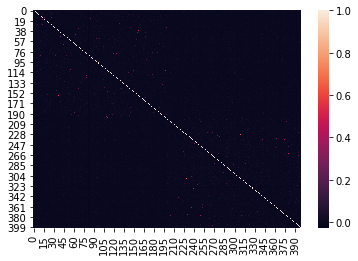

In [89]:
sns.heatmap(distance_matrix)

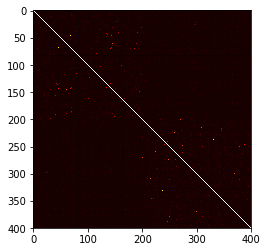

In [90]:
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [91]:
YYY = Y

In [92]:
Z = np.zeros([399,4])
A = np.arange(0,400)
sz = np.ones(400)
cnt = 0
YYYY = YYY
def super_recursion():
    global YYY
    global A
    global sz
    global Z
    global cnt
    global YYYY
    if YYY.shape[0]==2:
        YYYY = YYY
    if YYY.shape[0]<=1:
        print(YYY)
        return ;
    sqa = np.square(YYY)
    sqa = np.sum(sqa,axis=1).tolist()
    square_roota = np.sqrt(sqa)
    YY=YYY/square_roota[:,None]
    distance_matrixa = YY.dot(YY.T)
    distance_matrixa = distance_matrixa.real
    np.fill_diagonal(distance_matrixa, -np.inf)
    i,j = np.unravel_index(distance_matrixa.argmax(),distance_matrixa.shape)
    one = YYY[i]
    two = YYY[j]
    avg = (one+two)/2.0
    Z[cnt,0] = A[i]
    Z[cnt,1] = A[j]
    Z[cnt,2] = distance_matrixa[i,j]
    Z[cnt,3] = sz[i] + sz[j]
    YYY[i] = avg
    YYY = np.delete(YYY,[j],axis=0)
    A[i] = cnt + 400
    A = np.delete(A,[j],axis=0)
    sz[i] = sz[i] + sz[j]
    sz = np.delete(sz,[j],axis=0)
    cnt+=1
    #print(YYY.shape)
    super_recursion()

In [93]:
super_recursion()

[[ 1.38967444e+01+0.j  8.37171791e+00+0.j -5.62601197e-01+0.j
   3.19412900e-01+0.j -1.13405131e+00+0.j -2.64561231e+00+0.j
  -9.25057462e-01+0.j  3.32059680e-01+0.j  9.59867537e-02+0.j
  -6.31108473e-01+0.j  2.39093560e-01+0.j  1.15919571e-01+0.j
   3.57940145e-01+0.j  8.05113024e-01+0.j  3.05898199e-01+0.j
  -3.08893259e-01+0.j -4.10586252e-01+0.j  2.29815486e-01+0.j
   2.85924572e-01+0.j -8.31641156e-02+0.j  3.62012147e-01+0.j
   1.45212552e-01+0.j  3.96042215e-01+0.j -1.61687966e-01+0.j
   3.09498013e-01+0.j  4.79442842e-01+0.j  1.03695857e+00+0.j
   7.68963940e-02+0.j -5.17677670e-02+0.j  4.40234978e-01+0.j
   1.31344309e-02+0.j -9.86426464e-01+0.j  1.48093732e+00+0.j
   2.81764889e-01+0.j -2.77339101e-01+0.j  2.78716704e-03+0.j
  -8.60463627e-02+0.j  1.17299584e-01+0.j -4.86562553e-01+0.j
   8.04256588e-02+0.j -1.12258315e-01+0.j  1.86029751e-02+0.j
  -9.68423401e-03+0.j -4.88295265e-01+0.j -6.84229333e-02+0.j
   2.79589018e-02+0.j -4.60023117e-01+0.j  1.79355872e-01+0.j
  -4.490

In [94]:
Z

array([[ 2.20000000e+01,  1.70000000e+02,  1.00000000e+00,
         2.00000000e+00],
       [ 1.25000000e+02,  1.76000000e+02,  8.77098721e-01,
         2.00000000e+00],
       [ 2.37000000e+02,  3.31000000e+02,  7.90107314e-01,
         2.00000000e+00],
       ...,
       [ 7.93000000e+02,  7.94000000e+02, -1.08161494e-01,
         1.32000000e+02],
       [ 7.96000000e+02,  7.92000000e+02, -1.65518263e-01,
         1.87000000e+02],
       [ 7.97000000e+02,  7.95000000e+02, -2.19065106e-01,
         4.00000000e+02]])

In [95]:
for i in range(0,Z.shape[0]):
    Z[i,2] = 1.0 - Z[i,2]

In [96]:
for i in range(0,Z.shape[0]):
    if(Z[i,2]<0):
        Z[i,2]=0

In [97]:
for i in range(0,Z.shape[0]):
    print("{}    {}   {}".format(Z[i,0],Z[i,1],Z[i,3]))

22.0    170.0   2.0
125.0    176.0   2.0
237.0    331.0   2.0
46.0    68.0   2.0
326.0    335.0   2.0
229.0    310.0   2.0
369.0    379.0   2.0
300.0    406.0   3.0
161.0    167.0   2.0
38.0    157.0   2.0
239.0    328.0   2.0
236.0    309.0   2.0
264.0    381.0   2.0
111.0    198.0   2.0
215.0    411.0   3.0
224.0    259.0   2.0
238.0    375.0   2.0
248.0    274.0   2.0
61.0    145.0   2.0
200.0    270.0   2.0
80.0    124.0   2.0
414.0    363.0   4.0
230.0    376.0   2.0
250.0    378.0   2.0
20.0    26.0   2.0
231.0    312.0   2.0
246.0    388.0   2.0
45.0    63.0   2.0
252.0    383.0   2.0
110.0    196.0   2.0
228.0    282.0   2.0
430.0    271.0   3.0
403.0    144.0   3.0
56.0    109.0   2.0
134.0    142.0   2.0
14.0    17.0   2.0
258.0    303.0   2.0
149.0    195.0   2.0
418.0    179.0   3.0
70.0    186.0   2.0
41.0    191.0   2.0
440.0    49.0   3.0
217.0    345.0   2.0
103.0    123.0   2.0
233.0    278.0   2.0
137.0    193.0   2.0
101.0    162.0   2.0
79.0    116.0   2.0
337.0    

In [98]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

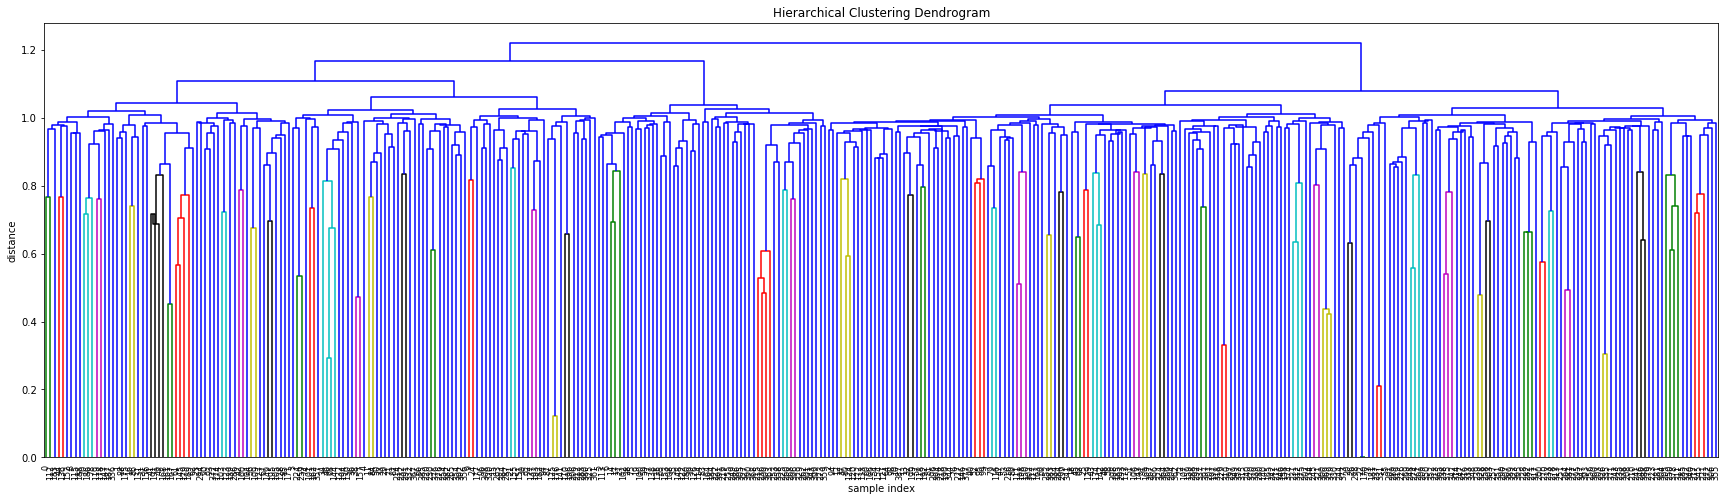

In [99]:
plt.figure(figsize=(30,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [100]:
YYYY

array([[ 1.38967444e+01+0.j,  8.37171791e+00+0.j, -5.62601197e-01+0.j,
         3.19412900e-01+0.j, -1.13405131e+00+0.j, -2.64561231e+00+0.j,
        -9.25057462e-01+0.j,  3.32059680e-01+0.j,  9.59867537e-02+0.j,
        -6.31108473e-01+0.j,  2.39093560e-01+0.j,  1.15919571e-01+0.j,
         3.57940145e-01+0.j,  8.05113024e-01+0.j,  3.05898199e-01+0.j,
        -3.08893259e-01+0.j, -4.10586252e-01+0.j,  2.29815486e-01+0.j,
         2.85924572e-01+0.j, -8.31641156e-02+0.j,  3.62012147e-01+0.j,
         1.45212552e-01+0.j,  3.96042215e-01+0.j, -1.61687966e-01+0.j,
         3.09498013e-01+0.j,  4.79442842e-01+0.j,  1.03695857e+00+0.j,
         7.68963940e-02+0.j, -5.17677670e-02+0.j,  4.40234978e-01+0.j,
         1.31344309e-02+0.j, -9.86426464e-01+0.j,  1.48093732e+00+0.j,
         2.81764889e-01+0.j, -2.77339101e-01+0.j,  2.78716704e-03+0.j,
        -8.60463627e-02+0.j,  1.17299584e-01+0.j, -4.86562553e-01+0.j,
         8.04256588e-02+0.j, -1.12258315e-01+0.j,  1.86029751e-02+0.j,
      

In [101]:
sqa = np.square(YYYY)
sqa = np.sum(sqa,axis=1).tolist()
square_roota = np.sqrt(sqa)
YY=YYYY/square_roota[:,None]

sqa1 = np.square(Y)
sqa1 = np.sum(sqa1,axis=1).tolist()
square_roota1 = np.sqrt(sqa1)
YY1=Y/square_roota1[:,None]

cluster_distance = YY.dot(YY1.T)
cluster_distance = cluster_distance.real
cluster_distance = 1 - cluster_distance
cluster_distance

array([[1.02125144, 1.02218391, 1.02469351, 1.01340816, 1.00736427,
        1.02065835, 1.02134601, 1.03545241, 1.01796209, 1.0132919 ,
        1.02543987, 1.02957108, 1.03110747, 1.02802571, 1.0315287 ,
        1.00648986, 1.01193503, 1.03416968, 0.94709521, 1.00130419,
        1.03677632, 1.03179902, 1.04061867, 0.99885213, 1.01625088,
        1.00144071, 1.04027833, 1.02373075, 1.00585011, 1.02136039,
        1.02564903, 1.0063253 , 1.03511805, 1.02458653, 1.03296752,
        0.98658171, 0.99898428, 1.03472465, 1.00031852, 0.98472487,
        0.97982485, 1.03490849, 1.00536209, 1.02355584, 1.02844186,
        0.98354553, 1.04420325, 1.02779177, 1.01828278, 1.03697353,
        1.02655454, 1.03072894, 1.02584023, 1.0334086 , 1.03432999,
        0.94232602, 1.01677905, 1.02767638, 1.03255428, 1.01776285,
        1.02655606, 1.04283905, 1.02132318, 0.98000588, 1.03286591,
        0.96494517, 1.0015072 , 1.03223793, 1.04339106, 0.98961808,
        1.04909097, 1.03064341, 0.99960751, 1.02

In [102]:
sum1 = 0
sum2 = 0
cnt1 = 0
cnt2 = 0
for i in range(0,400):
    d1 = cluster_distance[0][i]
    d2 = cluster_distance[1][i]
    
    if d1<=d2:
        sum1+=d1
        cnt1+=1
    else:
        sum2+=d2
        cnt2+=1

In [103]:
r1 = np.sqrt(sum1/cnt1)
r2 = np.sqrt(sum2/cnt2)

In [104]:
r1

0.9968844984701251

In [105]:
r2

0.9899265014966265

In [106]:
cnt1

113

In [107]:
cnt2

287

In [108]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(Y)
# Centroid values
centroids = kmeans.cluster_centers_

/home/mohit/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [109]:
centroids

array([[ 3.06900011e-03,  1.17634373e-03, -3.00970949e-04,
        -1.58026672e-02, -6.84029270e-03,  2.93896979e-04,
         2.74755958e-02,  1.01231439e-01,  1.66391945e-02,
        -3.17255148e-01, -3.67393915e-02,  8.13129454e-03,
         1.73451537e-01, -1.12315072e-01, -1.54268990e-02,
        -9.50988877e-03, -7.86144130e-03, -1.31743731e-02,
        -1.31293965e-02, -3.89374291e-03, -4.20127242e-03,
        -6.14631756e-03, -1.08642305e-03,  1.70547595e-03,
        -2.02158887e-02, -2.27633585e-03,  1.16455345e-03,
        -3.49755985e-03, -2.09038529e-03, -2.63366992e-03,
         2.86452172e-04,  1.40522329e-02,  2.75388982e-03,
        -2.62379950e-03,  5.27620756e-03, -6.39917767e-03,
        -3.51256886e-03, -2.62291229e-04, -1.66485826e-03,
         6.43300941e-03, -2.36091664e-02, -1.99847298e-02,
         2.10294971e-02,  6.66334372e-03, -2.63106285e-03,
        -2.22431852e-03, -6.26591241e-03, -1.78106659e-03,
        -3.25680978e-04,  4.46572289e-03,  1.49310719e-0

In [110]:
sqa = np.square(centroids)
sqa = np.sum(sqa,axis=1).tolist()
square_roota = np.sqrt(sqa)
YY=centroids/square_roota[:,None]

sqa1 = np.square(Y)
sqa1 = np.sum(sqa1,axis=1).tolist()
square_roota1 = np.sqrt(sqa1)
YY1=Y/square_roota1[:,None]

cluster_distance = YY.dot(YY1.T)
cluster_distance = cluster_distance.real
cluster_distance = 1 - cluster_distance
cluster_distance

array([[0.99404746, 0.99211502, 0.99354198, 0.99390485, 0.99600328,
        0.99373224, 0.99266432, 0.99323148, 0.99266147, 0.99285673,
        0.99488815, 0.99261332, 0.99646165, 0.99332029, 0.99160518,
        0.99429005, 0.99391996, 0.9971369 , 0.99389385, 0.99742596,
        0.99324662, 0.99433473, 0.99013119, 0.99336642, 0.99252852,
        0.99432558, 0.99250082, 0.99291149, 0.9928984 , 0.99363651,
        0.9919843 , 0.9933306 , 0.99263144, 0.99323785, 0.99246139,
        0.99738859, 0.99322545, 0.99473276, 0.99272415, 0.9934905 ,
        0.99372475, 0.99158281, 0.99333516, 0.99309556, 0.99234659,
        0.99329039, 0.99129186, 0.99326609, 0.99206739, 0.99187418,
        0.99394281, 0.99335749, 0.9907303 , 0.99271054, 0.99234233,
        0.99401642, 0.99138738, 0.9940552 , 0.99344183, 0.99398691,
        0.99319421, 0.98949466, 0.99338813, 0.99451748, 0.99135014,
        0.99287159, 0.99465391, 0.9913973 , 0.99121844, 0.99335136,
        0.98874628, 0.99301571, 0.99293407, 0.99

In [111]:
sum3 = 0
sum4 = 0
cnt3 = 0
cnt4 = 0
for i in range(0,400):
    d1 = cluster_distance[0][i]
    d2 = cluster_distance[1][i]
    
    if d1<=d2:
        sum3+=d1
        cnt3+=1
    else:
        sum4+=d2
        cnt4+=1

In [112]:
cnt3

363

In [113]:
cnt4

37